## Question 1.1 -- Regression as minimization

Derive the closed form solution for ***a*** in a 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
- ***b*** is found by taking partial derivates with respect to ***b*** and setting it to zero. This gives $$ b = \frac{\sum_{i=0}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=0}^{n}(x_i - \bar{x})^2} $$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

*Add your answer here*

# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Grading is based on effort and you can either obtain a pass or fail for the assignment.

## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not?

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*

There is one minimum value,but multiple combinations of (a and b) to achieve this output. So no there's multiple combinations of a and b

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?

Using mean squared error (MSE) instead of sum of squared errors (SSE) doesn't change the solutions for a and b. MSE is like averaging SSE, adjusting for the number of data points.
The goal remains the same we try to minimize the gap between actual data and predicted values by changing the values of a and b.
So, switching from SSE to MSE won't alter the solutions for $a$ and $b$. They stay the same, as both methods aim for the best data fit.

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it!
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---


Your results should look something like this:
![image.png](attachment:image.png)

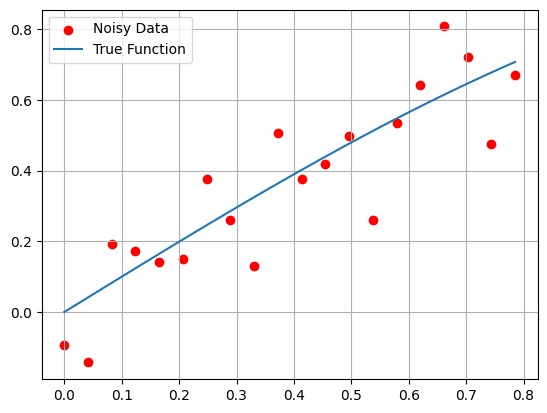

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(0)

def generate_sin(x, epsilon):
    func = np.random.normal(np.sin(x), epsilon)
    return func

n_samples = 20
epsilon = 0.1

# create noisy function
x = np.linspace(0, np.pi/4, n_samples)
y = generate_sin(x, epsilon)

# Create true function
x_pure = np.linspace(0, np.pi/4, 1000)
y_pure = np.sin(x_pure)

# plot data, line
plt.scatter(x,y, label="Noisy Data", color="red")
plt.plot(x_pure, y_pure, label="True Function")
plt.grid()
plt.legend()
plt.show()

## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

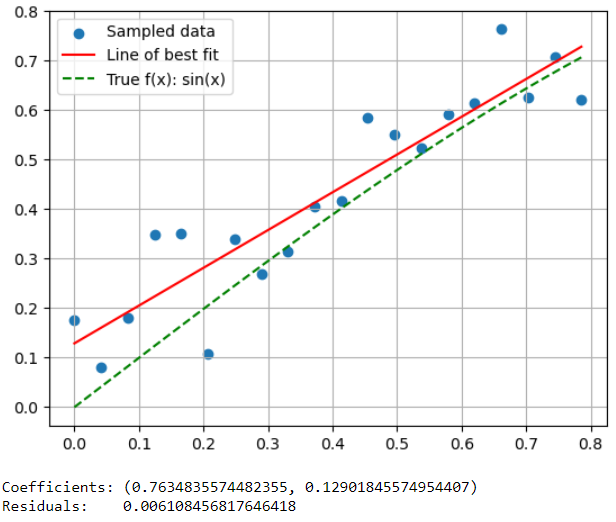

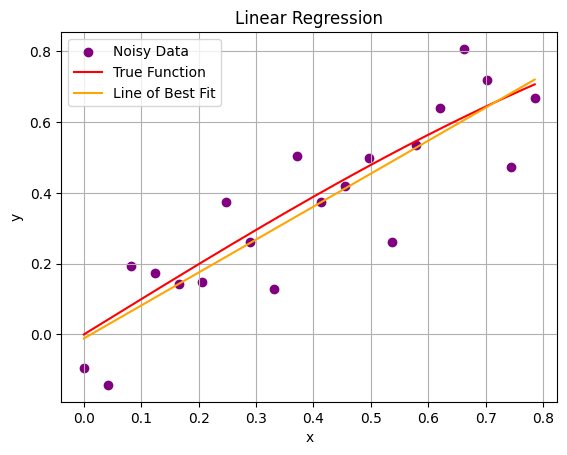

Coefficients: (-0.011345381692673795, 0.9321779653555395)
Residuals:    0.29150632724738224


In [ ]:
def compute_sos(xs, ys, a, b):
    # sum of squared errors
    sos = np.sum((a + b*x - ys)**2)
    return sos

def lin_reg(xs, ys):
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)
    b = np.sum((xs - x_mean)*(ys - y_mean))/np.sum((xs - x_mean)**2)
    a = y_mean - (b * x_mean)
    res = compute_sos(xs, ys, a, b)
    return a, b, res

# TODO: generate line of best fit
a, b, res = lin_reg(x, y)
y_best = b*x + a


# Plot line of best fit, data, etc
plt.scatter(x, y, label="Noisy Data", color="purple")
plt.plot(x_pure, y_pure, label="True Function", color='red')
plt.plot(x, y_best, label="Line of Best Fit", color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid()
plt.show()

print("Coefficients:", (a, b))
print("Residuals:   ", res)

## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

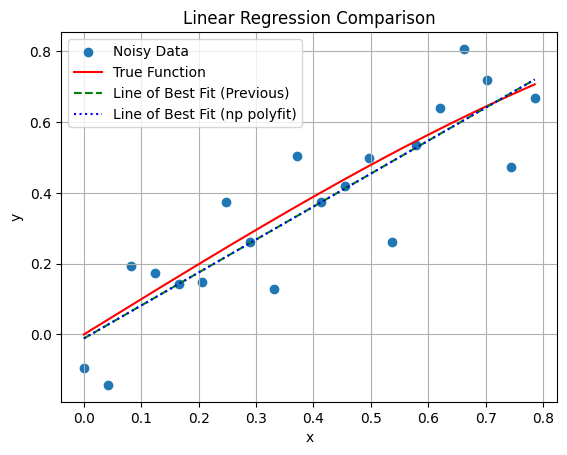

Coefficients:      (-0.011345381692673795, 0.9321779653555395)
Residuals:         0.29150632724738224
Coefficients (np): (-0.01134538169267377, 0.9321779653555397)
Residuals (np):    0.2915063272473822


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# TODO: use np polyfit here
b_np, a_np = np.polyfit(x, y, 1)
y_best_np = b_np*x + a_np
res_np = compute_sos(x, y, a_np, b_np)

# TODO: plot everything you need to

plt.scatter(x, y, label="Noisy Data")
plt.plot(x_pure, y_pure, label="True Function", color='red')
plt.plot(x, y_best, label="Line of Best Fit (Previous)", color='green', linestyle='dashed')
plt.plot(x, y_best_np, label="Line of Best Fit (np polyfit)", color='blue', linestyle='dotted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Comparison')
plt.legend()
plt.grid()
plt.show()

# print results
print("Coefficients:     ", (a, b))
print("Residuals:        ", res)
print("Coefficients (np):", (a_np, b_np))
print("Residuals (np):   ", res_np)

*Add your text answer here*

## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors.

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before.
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

In [ ]:
def compute_mse(y_true, y_pred, a, b):
    mse = np.mean((y_true - y_pred)**2)
    return mse

x_test = np.linspace(0, np.pi/4, 50)
y_test = generate_sin(x_test, epsilon=0.1, n=50)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Train set)")
plt.scatter(x_test, y_test, label="Test set")

# TODO: plot data, lines of best fit, true function, make it pretty

plt.plot(x_train, y_train_pred, color='red', label='Line of Best Fit (Train)')
plt.plot(x_test, y_test_pred, color='green', label='Line of Best Fit (Test)')
plt.plot(x_train, np.sin(x_train), color='blue', linestyle='--', label='True Function')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Train and Test Sets with Lines of Best Fit')
plt.legend()
plt.show()

test_loss = compute_mse(x_test, y_test, a, b)
train_loss = compute_mse(x, y, a, b)

print("Coefficients: ", (a, b))
print("Train loss:   ", train_loss)
print("Test loss:    ", test_loss)

TypeError: generate_sin() got an unexpected keyword argument 'n'

Which of the two losses *should* be better? Which is actually better? Why?

We want the test loss to be lower than the train loss because it shows that our model is good at predicting new data. However, sometimes the test loss might be a bit higher, which is okay as long as it's not a big difference. In the code, we're checking how well our model does on data it hasn't seen before. So, ideally, the test loss should be lower because it means our model is doing well on new data.

## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).

Observations:

Increasing the number of data points (n) generally improves model performance, providing more information for learning. However, excessively large

n values may lead to overfitting.

Larger values of noise magnitude (ϵ) result in higher train and test losses due to increased difficulty in modeling noisy data.

## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

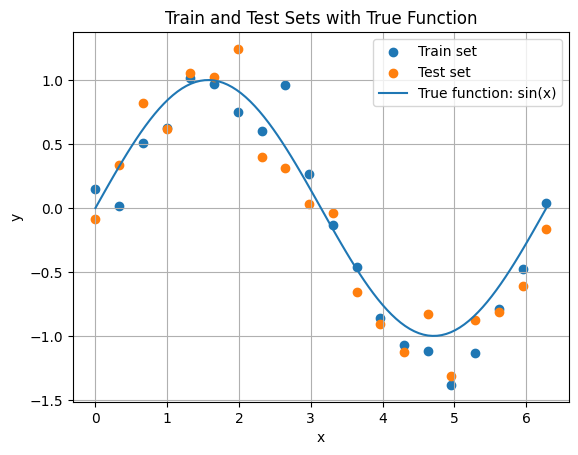

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the generate_sin function
def generate_sin(x, epsilon=0.1, n=50):
    return np.sin(x) + np.random.normal(0, epsilon, n)

# Define parameters
n_samples = 20

# Generate train and test data
x_train = np.linspace(0, 2*np.pi, n_samples)
y_train = generate_sin(x_train, epsilon=0.2, n=n_samples)
x_test = np.linspace(0, 2*np.pi, n_samples)
y_test = generate_sin(x_test, epsilon=0.2, n=n_samples)

# Generate pure sine wave for plotting
x_pure = np.linspace(0, 2*np.pi, 100)
y_pure = np.sin(x_pure)

# Plotting
plt.scatter(x_train, y_train, label="Train set")
plt.scatter(x_test, y_test, label="Test set")
plt.plot(x_pure, y_pure, label="True function: sin(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train and Test Sets with True Function')
plt.legend()
plt.grid()
plt.show()


## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Define degrees to test
degrees = range(1, 21)

# Initialize lists to store results
train_losses = []
test_losses = []
coefficients = []

# Iterate over polynomial degrees
for d in degrees:
    # Fit polynomial to train data
    coefficients_d = np.polyfit(x_train, y_train, d)

    # Evaluate polynomial on train and test data
    y_train_pred = np.polyval(coefficients_d, x_train)
    y_test_pred = np.polyval(coefficients_d, x_test)

    # Compute train and test losses
    train_loss_d = mean_squared_error(y_train, y_train_pred)
    test_loss_d = mean_squared_error(y_test, y_test_pred)

    # Store results
    train_losses.append(train_loss_d)
    test_losses.append(test_loss_d)
    coefficients.append(coefficients_d)

# Display results
for d, train_loss_d, test_loss_d, coefficients_d in zip(degrees, train_losses, test_losses, coefficients):
    print(f"Degree {d}: Train Loss={train_loss_d:.4f}, Test Loss={test_loss_d:.4f}, Coefficients={coefficients_d}")


Degree 1: Train Loss=0.3097, Test Loss=0.2704, Coefficients=[-0.27875748  0.79837098]
Degree 2: Train Loss=0.3083, Test Loss=0.2710, Coefficients=[-0.01149742 -0.20651705  0.72670256]
Degree 3: Train Loss=0.0410, Test Loss=0.0336, Coefficients=[ 0.09624785 -0.91861208  2.01542039 -0.28514454]
Degree 4: Train Loss=0.0273, Test Loss=0.0532, Coefficients=[ 0.0133409  -0.07139883 -0.25229302  1.13802717 -0.07311951]
Degree 5: Train Loss=0.0167, Test Loss=0.0517, Coefficients=[-0.00727674  0.12764369 -0.70271249  1.18520482 -0.03319543  0.08623121]
Degree 6: Train Loss=0.0167, Test Loss=0.0518, Coefficients=[-1.03331611e-04 -5.32898653e-03  1.13847183e-01 -6.57497642e-01
  1.11780594e+00  3.72304297e-03  8.33740569e-02]
Degree 7: Train Loss=0.0162, Test Loss=0.0533, Coefficients=[-6.68704198e-04  1.46022418e-02 -1.32535989e-01  6.60628183e-01
 -1.86756557e+00  2.39603116e+00 -4.95694649e-01  1.04774773e-01]
Degree 8: Train Loss=0.0143, Test Loss=0.0560, Coefficients=[ 8.20632363e-04 -2.1293

<ipython-input-2-cce3a60ddd1e>:15: RankWarning: Polyfit may be poorly conditioned
  coefficients_d = np.polyfit(x_train, y_train, d)
<ipython-input-2-cce3a60ddd1e>:15: RankWarning: Polyfit may be poorly conditioned
  coefficients_d = np.polyfit(x_train, y_train, d)
<ipython-input-2-cce3a60ddd1e>:15: RankWarning: Polyfit may be poorly conditioned
  coefficients_d = np.polyfit(x_train, y_train, d)


**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

What does this mean?

*Add your text answer here*

## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define degrees to plot
degrees_to_plot = [1, 2, 3, 5, 10, 20]

# Generate pure sine wave for plotting
x_pure = np.linspace(0, 2*np.pi, 100)
y_pure = np.sin(x_pure)

# Plotting
plt.figure(figsize=(15, 10))

for i, d in enumerate(degrees_to_plot):
    # Fit polynomial to train data
    coefficients_d = np.polyfit(x_train, y_train, d)

    # Evaluate polynomial on pure x values
    y_pred = np.polyval(coefficients_d, x_pure)

    # Plot data points
    plt.subplot(2, 3, i+1)
    plt.scatter(x_train, y_train, label="Train set")
    plt.scatter(x_test, y_test, label="Test set")

    # Plot true underlying function
    plt.plot(x_pure, y_pure, label="True function: sin(x)", color='red')

    # Plot polynomial line of best fit
    plt.plot(x_pure, y_pred, label=f"Degree {d} polynomial fit", linestyle='--')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Polynomial Fit (Degree {d})')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Plot train and test losses
plt.plot(degrees, train_losses, label='Train set', marker='o')
plt.plot(degrees, test_losses, label='Test set', marker='o')

plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Losses vs. Model Flexibility')
plt.xticks(degrees)
plt.legend()
plt.grid()

plt.show()


## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?


Identifying Overfitting: Overfitting happens when a model learns too much from the training data and doesn't do well on new, unseen data. We can spot it when the model starts getting too good at the training data but not as good at new data.

Best Fit to Training Data: The best fit to the training data is the one that makes the model perform best on the data it was trained on. It's like a perfect match for the data we already have.

Best Fit to the Underlying Function: This means finding the model that looks the most like the real pattern behind the data. It might not always be the same as the best fit to the training data because sometimes simpler models do a better job of capturing the real pattern.

Effect of More Training Points: Having more data can help the model understand the underlying pattern better, so it's less likely to overfit. But just having more data doesn't always mean the model will become more flexible because it also depends on how complex the underlying pattern is and how noisy the data is. Sometimes, more data won't make much of a difference if the real pattern is too complex or if there's a lot of noise in the data.